Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [138]:
NAME = "Julie Berendschot #2013083"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam September 21st, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam September 21, 2018".



## Generating and plotting data

We start by importing the usual libraries.

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

#### a) [0.5 point] Explain in words what the following code does. 

In [140]:
n_observations = 100
x = np.random.uniform(0,2,size=n_observations)
df = pd.DataFrame({'x': x})

np.random.uniform is a function that is assigned to the variable x. The function draws random samples from a uniform distribution. The first argument of the function (=0) gives the lower boundery of the output interval, so all values in the random sample are greater or equal to zero. The second argument of the function (=2) gives the upper boundery of the output interval, so all values in the random sample are lower than two. Finally the last argument gives the size of the random sample, in this case the number of observations is equal to 100. 

The variable df is assigned to a pandas dataframe. The function pd.dataframe creates a dataset of the random sample earlier assigned to the variable x. The letter x between apostrophes ('..') is the name of the label assigned the values drawn from the sample.

Now we are going to add some columns to the dataframe `df`.

#### b) [0.5 points] Add two columns to the data frame: (i) column `y` where $y=3*x+5$ and (ii) column `z` where $z = (x-1)^2$.

In [141]:
y = 3*x+5
z = (x-1)**2
df2 = pd.DataFrame({'y':y})
df3 = pd.DataFrame({'z':z})
new_dataframe = df.join([df2, df3])
print(new_dataframe)

           x          y         z
0   0.185968   5.557905  0.662647
1   0.028595   5.085785  0.943627
2   1.002118   8.006355  0.000004
3   0.069955   5.209866  0.864983
4   1.632437   9.897312  0.399977
5   0.436801   6.310404  0.317193
6   1.002070   8.006210  0.000004
7   1.721265  10.163796  0.520224
8   1.550421   9.651262  0.302963
9   1.728354  10.185061  0.530499
10  1.867302  10.601905  0.752212
11  0.944495   7.833485  0.003081
12  0.938674   7.816023  0.003761
13  0.045062   5.135186  0.911907
14  1.766442  10.299325  0.587433
15  1.427980   9.283939  0.183166
16  0.330484   5.991452  0.448252
17  1.697385  10.092155  0.486346
18  1.550814   9.652441  0.303396
19  0.408773   6.226320  0.349549
20  1.530200   9.590599  0.281112
21  1.975884  10.927652  0.952350
22  1.477592   9.432775  0.228094
23  1.011794   8.035382  0.000139
24  0.027249   5.081748  0.946244
25  1.998096  10.994288  0.996196
26  0.144753   5.434259  0.731448
27  0.419430   6.258290  0.337061
28  1.632186  

#### c) [0.5 point] Calculate the means and standard deviations for `x` and `y`. 

[hint: you can do this with one command or with four separate commands]

In [142]:
new_dataframe.describe()

,x,y,z
count,100.000000,100.000000,100.000000
mean,1.100292,8.300877,0.374412
std,0.606658,1.819975,0.311791
min,0.016864,5.050593,0.000003
25%,0.569313,6.707940,0.118516
50%,1.201966,8.605898,0.289471
75%,1.608152,9.824456,0.591200
max,1.998096,10.994288,0.996196


#### d) [0.5 points] Use your knowledge of statistics to explain the relations (i) between the means of `x` and `y` and (ii) between the standard deviations of `x` and `y`.

y is a linear transformation of x. This means that.. 
E(y) = E(3x+5) = 3E(x) + 5
SD(y) = SD(3x+5) = 3SD(x)
If we use the following information from statistics in the Code cell below, we will see that this creates the same values as given in the summary above.

In [143]:
mean_y = 3*np.mean(x) + 5
sd_y = 3*np.std(x)
print(np.mean(x))
print(np.std(x))
print(mean_y)
print(sd_y)

1.100292190091755
0.6036173812057756
8.300876570275264
1.8108521436173266


#### e) [1 point] Plot a histogram of `x` with fractions (not absolute numbers) on the vertical axis. Add the label $x$ to the horizontal axis.

Text(0.5,0,'$x$')

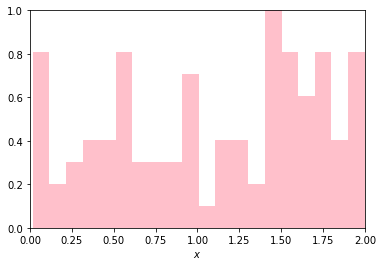

In [144]:
plt.hist(x, bins=20, normed=1, facecolor='pink')
plt.axis([0, 2, 0, 1])
plt.xlabel('$x$')

#### f) [0.5 points] Make a scatter plot of `y` vs `z` with the label $y$ on the horizontal axis and the label $z$ on the vertical axis.

Text(0,0.5,'$z$')

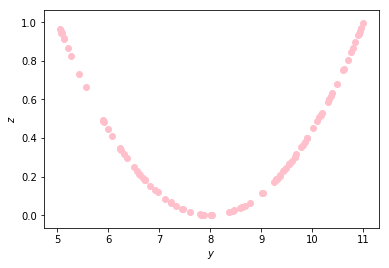

In [145]:
plt.scatter(y,z, facecolor='pink')
plt.xlabel('$y$')
plt.ylabel('$z$')

This relation looks rather "perfect". We want to make a "noisy" version of this graph.

#### g) [0.5 points] Create a variable `z2` equal to `z` but with some "noise" added to it. That is, add a random variable (vector) with mean 0 to `z` to get `z2`. Then plot `y` against `z2`. Adjust the standard deviation of the "noise" variable such that the shape of the figure under f) can still be recognized but not perfectly.

[hint: under a) you have seen the library that contains functions to create a "noisy variable"]

Text(0,0.5,'$z2$')

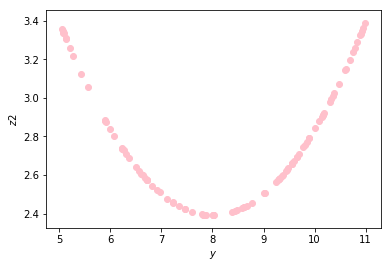

In [146]:
z2 = z + np.random.normal(0,10)
plt.scatter(y, z2, facecolor='pink')
plt.xlabel('$y$')
plt.ylabel('$z2$')

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.